Exercise 1: Use MP neurons to build a simple neural network that performs logical operations
OR, AND and NOR

In [ ]:
#AND GATE

x1 = [0,0,1,1]
x2 = [0,1,0,1]
w1 = [1,1,1,1]
w2 = [1,1,1,1]

t = 2

print("x1   x2   w1   w2   t   0")
for i in range(len(x1)):
  if(x1[i]*w1[i] + x2[i]*w2[i]) >= t:
    print(x1[i],'   ',x2[i],'   ',w1[i],'   ',w2[i],'   ',t,'   ', 1)
  else:
    print(x1[i],'   ',x2[i],'   ',w1[i],'   ',w2[i],'   ',t,'   ', 0)

x1   x2   w1   w2   t   0
0     0     1     1     2     0
0     1     1     1     2     0
1     0     1     1     2     0
1     1     1     1     2     1


In [ ]:
#OR GATE

x1 = [0,0,1,1]
x2 = [0,1,0,1]
w1 = [1,1,1,1]
w2 = [1,1,1,1]

t = 1

print("x1   x2   w1   w2   t   0")
for i in range(len(x1)):
  if(x1[i]*w1[i] + x2[i]*w2[i]) >= t:
    print(x1[i],'   ',x2[i],'   ',w1[i],'   ',w2[i],'   ',t,'   ', 1)
  else:
    print(x1[i],'   ',x2[i],'   ',w1[i],'   ',w2[i],'   ',t,'   ', 0)


x1   x2   w1   w2   t   0
0     0     1     1     1     0
0     1     1     1     1     1
1     0     1     1     1     1
1     1     1     1     1     1


In [ ]:
# NOR GATE

x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]
w1 = [-1, -1, -1, -1]
w2 = [-1, -1, -1, -1]

t = 0

print("x1   x2   w1   w2   t   0")
for i in range(len(x1)):
    if (x1[i] * w1[i] + x2[i] * w2[i]) >= t:
        print(x1[i], '   ', x2[i], '   ', w1[i], '   ', w2[i], '   ', t, '   ', 1)
    else:
        print(x1[i], '   ', x2[i], '   ', w1[i], '   ', w2[i], '   ', t, '   ', 0)

x1   x2   w1   w2   t   0
0     0     -1     -1     0     1
0     1     -1     -1     0     0
1     0     -1     -1     0     0
1     1     -1     -1     0     0


Exercise 2: Implement an MP neuron for a binary classification problem using a breast cancer
dataset.

• Analyze the effects of scaling on MP Neuron's decision-making process and accuracy.
Apply different scaling techniques (min-max normalization, standardization) to the breast
cancer dataset features. Train the MP Neuron with these scaled features and compare the
model's performance with unscaled data.

• Compare the MP Neuron model's performance with a logistic regression model in accuracy.

In [ ]:
##LOAD DATA

import sklearn.datasets
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target
print(X.shape,Y.shape)

(569, 30) (569,)


In [ ]:
#Test Train Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)
print(Y.mean(),Y_test.mean(),Y_train.mean())

0.6274165202108963 0.631578947368421 0.626953125


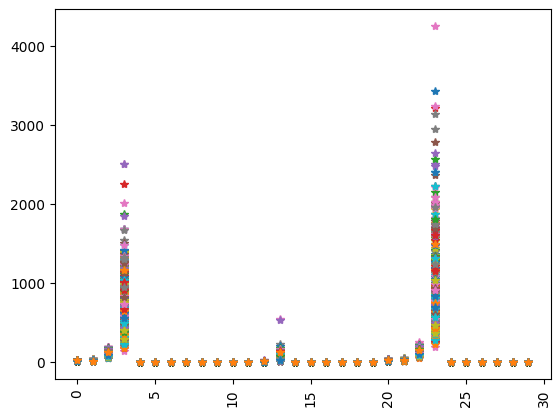

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
##IMPLEMENTING THE MP NEURON

class MPNeuron:
    def __init__(self, threshold=10):
        self.threshold = threshold

    def predict(self, X):
        # Binary step function based on threshold
        return np.where(np.sum(X, axis=1) >= self.threshold, 1, 0)


In [ ]:
##APPLYING SCALING TECHNIQUES

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-max normalization
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Standardization
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)


In [ ]:
##COMPARING

import numpy as np
from sklearn.metrics import accuracy_score

In [ ]:
mp_neuron = MPNeuron(threshold=10)

# Unscaled data
y_pred_train_unscaled = mp_neuron.predict(X_train)
y_pred_test_unscaled = mp_neuron.predict(X_test)

# Min-max scaled data
y_pred_train_minmax = mp_neuron.predict(X_train_minmax)
y_pred_test_minmax = mp_neuron.predict(X_test_minmax)

# Standardized data
y_pred_train_standard = mp_neuron.predict(X_train_standard)
y_pred_test_standard = mp_neuron.predict(X_test_standard)


accuracy_train_unscaled = accuracy_score(Y_train, y_pred_train_unscaled)
accuracy_test_unscaled = accuracy_score(Y_test, y_pred_test_unscaled)

accuracy_train_minmax = accuracy_score(Y_train, y_pred_train_minmax)
accuracy_test_minmax = accuracy_score(Y_test, y_pred_test_minmax)

accuracy_train_standard = accuracy_score(Y_train, y_pred_train_standard)
accuracy_test_standard = accuracy_score(Y_test, y_pred_test_standard)

print("MP Neuron Accuracy (Unscaled Data) - Train: ", accuracy_train_unscaled, " Test: ", accuracy_test_unscaled)
print("MP Neuron Accuracy (Min-Max Scaled) - Train: ", accuracy_train_minmax, " Test: ", accuracy_test_minmax)
print("MP Neuron Accuracy (Standardized) - Train: ", accuracy_train_standard, " Test: ", accuracy_test_standard)


MP Neuron Accuracy (Unscaled Data) - Train:  0.626953125  Test:  0.631578947368421
MP Neuron Accuracy (Min-Max Scaled) - Train:  0.216796875  Test:  0.21052631578947367
MP Neuron Accuracy (Standardized) - Train:  0.134765625  Test:  0.12280701754385964


In [ ]:
##LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

# Logistic regression model
logistic_reg = LogisticRegression(max_iter=10000)

# Train and test on unscaled data
logistic_reg.fit(X_train, Y_train)
y_pred_train_lr_unscaled = logistic_reg.predict(X_train)
y_pred_test_lr_unscaled = logistic_reg.predict(X_test)

# Train and test on min-max scaled data
logistic_reg.fit(X_train_minmax, Y_train)
y_pred_train_lr_minmax = logistic_reg.predict(X_train_minmax)
y_pred_test_lr_minmax = logistic_reg.predict(X_test_minmax)

# Train and test on standardized data
logistic_reg.fit(X_train_standard, Y_train)
y_pred_train_lr_standard = logistic_reg.predict(X_train_standard)
y_pred_test_lr_standard = logistic_reg.predict(X_test_standard)

# Calculate accuracies for logistic regression
accuracy_train_lr_unscaled = accuracy_score(Y_train, y_pred_train_lr_unscaled)
accuracy_test_lr_unscaled = accuracy_score(Y_test, y_pred_test_lr_unscaled)

accuracy_train_lr_minmax = accuracy_score(Y_train, y_pred_train_lr_minmax)
accuracy_test_lr_minmax = accuracy_score(Y_test, y_pred_test_lr_minmax)

accuracy_train_lr_standard = accuracy_score(Y_train, y_pred_train_lr_standard)
accuracy_test_lr_standard = accuracy_score(Y_test, y_pred_test_lr_standard)

print("\nLogistic Regression Accuracy (Unscaled Data) - Train: ", accuracy_train_lr_unscaled, " Test: ", accuracy_test_lr_unscaled)
print("Logistic Regression Accuracy (Min-Max Scaled) - Train: ", accuracy_train_lr_minmax, " Test: ", accuracy_test_lr_minmax)
print("Logistic Regression Accuracy (Standardized) - Train: ", accuracy_train_lr_standard, " Test: ", accuracy_test_lr_standard)



Logistic Regression Accuracy (Unscaled Data) - Train:  0.958984375  Test:  0.9473684210526315
Logistic Regression Accuracy (Min-Max Scaled) - Train:  0.97265625  Test:  0.9649122807017544
Logistic Regression Accuracy (Standardized) - Train:  0.990234375  Test:  0.9824561403508771


Exercise 3: Implement Perceptron for Breast Cancer Classification

a. Load and Explore the Dataset

b. Split the Data into Training and Testing Sets

c. Standardize the Features : Standardize the features (i.e., transform them to have a
mean of 0 and a variance of 1) to ensure faster convergence of the Perceptron
algorithm.

d. Train the Perceptron Model

e. Make Predictions

f. Evaluate the Model

In [ ]:
import sklearn.datasets
import numpy as np
from sklearn.metrics import accuracy_score

# Loading dataset

In [ ]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [ ]:
X = breast_cancer.data
Y = breast_cancer.target

In [ ]:
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [ ]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [ ]:
data['class'] = breast_cancer.target

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
print(data['class'].value_counts())

class
1    357
0    212
Name: count, dtype: int64


In [ ]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [ ]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('class', axis=1)
Y = data['class']

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(569,) (426,) (143,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.630859375 0.5964912280701754


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y)

In [ ]:
print(X_train.mean(), X_test.mean(), X.mean())

mean radius                 14.080799
mean texture                19.319922
mean perimeter              91.657090
mean area                  650.756055
mean smoothness              0.096589
mean compactness             0.104428
mean concavity               0.087825
mean concave points          0.048493
mean symmetry                0.181836
mean fractal dimension       0.062927
radius error                 0.407787
texture error                1.222367
perimeter error              2.887709
area error                  40.658385
smoothness error             0.007062
compactness error            0.025427
concavity error              0.031514
concave points error         0.011676
symmetry error               0.020697
fractal dimension error      0.003810
worst radius                16.236307
worst texture               25.695781
worst perimeter            107.073105
worst area                 878.005859
worst smoothness             0.132698
worst compactness            0.255209
worst concav

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)

In [ ]:
print(X_train.mean(), X_test.mean(), X.mean())

mean radius                 14.058656
mean texture                19.309668
mean perimeter              91.530488
mean area                  648.097266
mean smoothness              0.096568
mean compactness             0.105144
mean concavity               0.089342
mean concave points          0.048892
mean symmetry                0.181961
mean fractal dimension       0.062979
radius error                 0.403659
texture error                1.206856
perimeter error              2.861173
area error                  39.935506
smoothness error             0.007067
compactness error            0.025681
concavity error              0.032328
concave points error         0.011963
symmetry error               0.020584
fractal dimension error      0.003815
worst radius                16.194275
worst texture               25.644902
worst perimeter            106.757715
worst area                 871.647852
worst smoothness             0.132592
worst compactness            0.257415
worst concav

In [ ]:
import matplotlib.pyplot as plt

# Perceptron Class

Defines a Perceptron model with methods for initialization, prediction, and fitting the model to the data.

Initializes the weights (w) and bias (b) of the Perceptron to None

Computes the dot product of the weights and the input vector. If the result is greater than or equal to the bias, it returns 1 (positive class); otherwise, it returns 0 (negative class).

Applies the model to each input in the dataset X to generate predictions for an entire batch.

Trains the Perceptron model using the input features X and labels Y over a specified number of epochs with a learning rate lr. Adjusts the weights and bias based on prediction errors, striving to increase the model's accuracy over iterations.

In [ ]:
X_train = X_train.values
X_test = X_test.values

In [ ]:
print (Y_train)

430    0
48     1
105    0
467    1
547    1
      ..
201    0
183    1
285    1
49     1
161    0
Name: class, Length: 512, dtype: int64


In [ ]:
class Perceptron:

  def __init__ (self):
    self.w = None
    self.b = None

  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0

  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y, epochs = 1, lr = 1):

    self.w = np.ones(X.shape[1])
    self.b = 0

    accuracy = {}
    max_accuracy = 0


    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1


      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b

    self.w = chkptw
    self.b = chkptb

    print(max_accuracy)


    plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.ylim([0, 1])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [ ]:
perceptron = Perceptron()

0.93359375


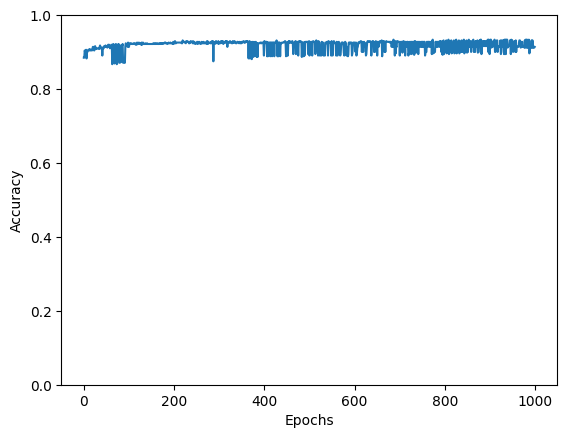

In [ ]:
perceptron.fit(X_train, Y_train, 1000, 0.0001)

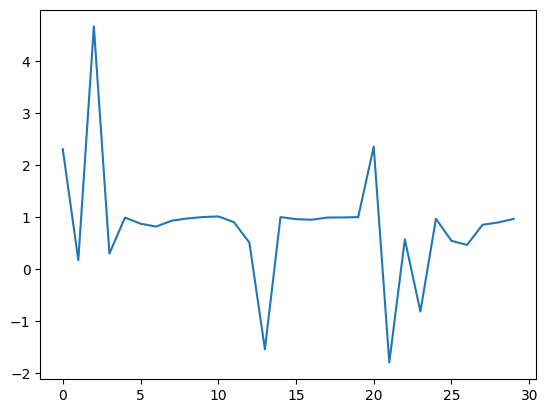

In [ ]:
plt.plot(perceptron.w)
plt.show()

0.9473684210526315


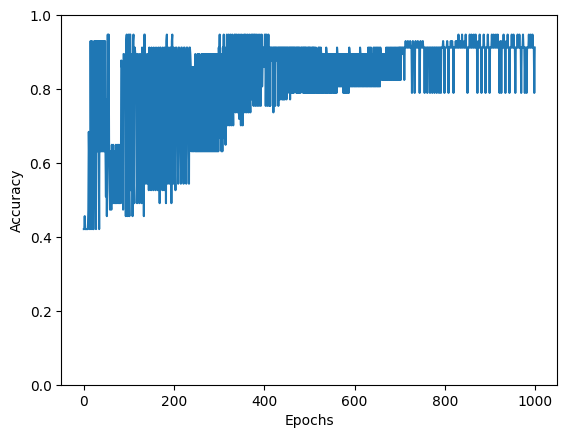

In [ ]:
perceptron.fit(X_test, Y_test, 1000, 0.0001)

Predicts the test set using the trained model and calculates the accuracy of these predictions compared to the true labels, providing a quantitative measure of model performance.

In [ ]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

0.9473684210526315


Exercise 4: Implement Perceptron algorithm on the binary Iris dataset and explore its
performance by adjusting learning rates and analyzing the weight changes during training

a. Understand the Iris Dataset and write a summary of features

b. Train/ Test Split

c. Implement the Perceptron Algorithm

d. Plot Train/Test Accuracy: Once the model is trained, evaluate the accuracy on both
the training and testing datasets. Plot the accuracy for the training and testing data
to visualize the model's performance over multiple epochs.

e. Experimenting with Learning Rates

f. Run the Perceptron algorithm with different learning rates.

▪ Observe how changing the learning rate impacts the model's ability to converge
and its overall accuracy.

▪ Interpret the results: Does a higher learning rate lead to faster convergence or
instability? Does a lower learning rate affect the speed or quality of the model's
learning?

g. Visualizing the Weight Changes

▪ During training, the Perceptron's weights are updated in each epoch. To
understand how the weights evolve:

o Create a weight matrix that stores the weight values for each epoch.

o After each epoch, append the current weights to the matrix.

o Plot the weights as they change across epochs. This will help visualize how
the model adjusts its weights based on the data.

o Write the Interpretation: After plotting the weight changes, explain how the
model's weights stabilize as it learns from the data. Do weights converge?

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
Y = iris.target

# Select only the first two classes for binary classification (Setosa and Versicolor)
binary_indices = np.where(Y < 2)
X = X[binary_indices]
Y = Y[binary_indices]

# Convert labels to 0 and 1
Y = np.where(Y == 0, 0, 1)

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (100, 4)
Shape of Y: (100,)


In [ ]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None
        self.accuracies = []

    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0

    def fit(self, X, Y):
        self.w = np.zeros(X.shape[1])
        self.b = 0
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = self.model(X[i])
                if Y[i] == 1 and y_pred == 0:
                    self.w += self.learning_rate * X[i]
                    self.b -= self.learning_rate
                elif Y[i] == 0 and y_pred == 1:
                    self.w -= self.learning_rate * X[i]
                    self.b += self.learning_rate
            # Calculate accuracy for visualization
            accuracy = self.accuracy(X, Y)
            self.accuracies.append(accuracy)

    def predict(self, X):
        return [self.model(x) for x in X]

    def accuracy(self, X, Y):
        Y_pred = self.predict(X)
        return np.mean(Y_pred == Y)


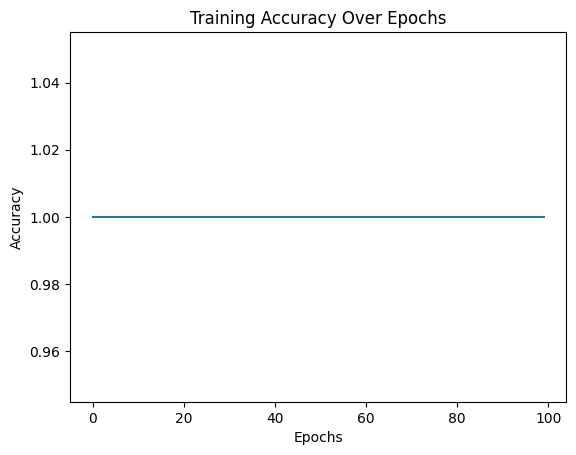

Test Set Accuracy: 1.0


In [ ]:
# Train the Perceptron
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X_train, Y_train)

# Plot accuracy over epochs
plt.plot(perceptron.accuracies)
plt.title("Training Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Test set accuracy
test_accuracy = perceptron.accuracy(X_test, Y_test)
print("Test Set Accuracy:", test_accuracy)


In [ ]:
learning_rates = [0.001, 0.01, 0.1]
for lr in learning_rates:
    perceptron = Perceptron(learning_rate=lr, epochs=100)
    perceptron.fit(X_train, Y_train)
    print(f"Learning Rate: {lr}, Final Training Accuracy: {perceptron.accuracies[-1]}")


Learning Rate: 0.001, Final Training Accuracy: 1.0
Learning Rate: 0.01, Final Training Accuracy: 1.0
Learning Rate: 0.1, Final Training Accuracy: 1.0


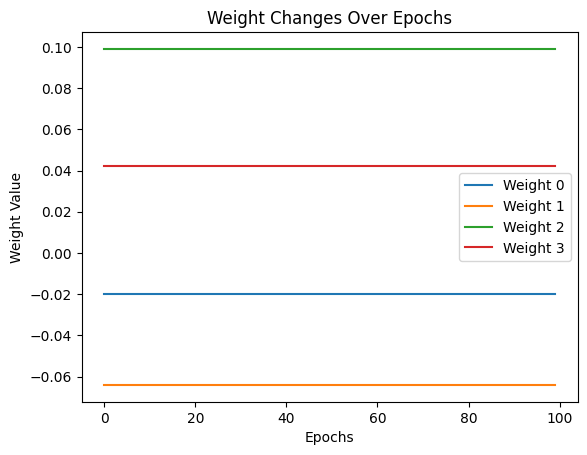

In [ ]:
class PerceptronWithWeightTracking(Perceptron):
    def __init__(self, learning_rate=0.01, epochs=100):
        super().__init__(learning_rate, epochs)
        self.weight_history = []

    def fit(self, X, Y):
        self.w = np.zeros(X.shape[1])
        self.b = 0
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = self.model(X[i])
                if Y[i] == 1 and y_pred == 0:
                    self.w += self.learning_rate * X[i]
                    self.b -= self.learning_rate
                elif Y[i] == 0 and y_pred == 1:
                    self.w -= self.learning_rate * X[i]
                    self.b += self.learning_rate
            # Store weights after each epoch
            self.weight_history.append(self.w.copy())

# Track and plot weight changes
perceptron_wt = PerceptronWithWeightTracking(learning_rate=0.01, epochs=100)
perceptron_wt.fit(X_train, Y_train)

# Plot weight changes
weights = np.array(perceptron_wt.weight_history)
for i in range(weights.shape[1]):
    plt.plot(weights[:, i], label=f"Weight {i}")
plt.title("Weight Changes Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Weight Value")
plt.legend()
plt.show()
